
similar implementation is also available __[here](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)__ . i have inspired two parts of codes of it :
1.pd.groupby() 2.confusion matrix.


and also I wanna give my thanks to my teacher __[dr. seyed naser razavi](https://github.com/snrazavi)__

In [1]:
import sys
sys.path.append(
    '/home/mahdi/machineLearning_f/Machine-learning-master/Supervised/utilities')

import preprocessing as prc
import models
import errors as e
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from ipywidgets import fixed, interact, interact_manual, interactive
from sklearn.feature_selection import SelectKBest
plt.style.use('fivethirtyeight')

display(HTML("<style>.container { width:89% !important; }</style>"))

In [2]:
df = pd.read_csv(
    '/home/mahdi/machineLearning_f/Machine-learning-master/Supervised/Regression/Logistic/data/bank-full.csv', delimiter=';')

## about data

In [3]:
print('number of rows : {} , number of columns : {}'.format(
    df.shape[0], df.shape[1]))
print()
print('keys : {}'.format(df.keys()))
print()
print(df.index)
print('\n')
print('information : \n{}'.format(df.info()))
print('\n')
print(df.describe())
print('\n')
print('data types : \n{}'.format(df.dtypes))
print('\n')
print('first 3:\n', df.head(3), '\n\nlast 3 : \n', df.tail(3))

number of rows : 45211 , number of columns : 17

keys : Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

RangeIndex(start=0, stop=45211, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  in

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

fortunately , data set contains no missing values :)

In [5]:
l = ['job', 'marital', 'education', 'housing', 'loan',
     'default', 'contact', 'month', 'poutcome', 'y']
for i in l:
    print(f'all kinds of {i} : {df[i].unique()}\n ')

all kinds of job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
all kinds of marital : ['married' 'single' 'divorced']
 
all kinds of education : ['tertiary' 'secondary' 'unknown' 'primary']
 
all kinds of housing : ['yes' 'no']
 
all kinds of loan : ['no' 'yes']
 
all kinds of default : ['no' 'yes']
 
all kinds of contact : ['unknown' 'cellular' 'telephone']
 
all kinds of month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 
all kinds of poutcome : ['unknown' 'failure' 'other' 'success']
 
all kinds of y : ['no' 'yes']
 


In [6]:
df.groupby('marital').std()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,10.124719,2926.453439,8.262271,263.807016,2.796826,102.327149,1.811625
married,10.264452,3140.962597,8.226741,253.164471,3.146143,97.227581,2.478797
single,7.603166,2875.317791,8.546200,263.845968,3.106302,105.041069,2.083432


In [7]:
df.groupby(['job']).mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [8]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [9]:
df.groupby('contact').median()

,age,balance,day,duration,campaign,pdays,previous
contact,,,,,,,
cellular,38,463,16,184,2,-1,0
telephone,47,657,17,155,2,-1,0
unknown,39,389,15,178,2,-1,0


In [10]:
df.groupby('month').mean()

,age,balance,day,duration,campaign,pdays,previous
month,,,,,,,
apr,39.770805,1542.551160,17.317190,298.098909,1.955321,95.201910,1.052524
aug,42.894509,1427.701777,16.432688,232.402113,3.927325,13.328958,0.278374
dec,44.457944,2315.672897,14.434579,329.327103,2.196262,108.780374,1.803738
feb,40.885240,1319.098905,6.354851,248.298226,2.382031,68.702907,1.182710
jan,40.493229,946.783321,27.456878,268.220242,1.672131,67.898076,1.185317
jul,41.008847,900.025526,18.694271,267.975344,3.524438,8.032342,0.129949
jun,42.438120,1608.222243,11.399551,243.087811,3.135368,9.154465,0.197903
mar,42.941300,2046.228512,14.134172,244.400419,2.205451,71.228512,1.188679
may,38.891109,1034.992590,15.491138,260.922272,2.447552,52.157344,0.584992


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 




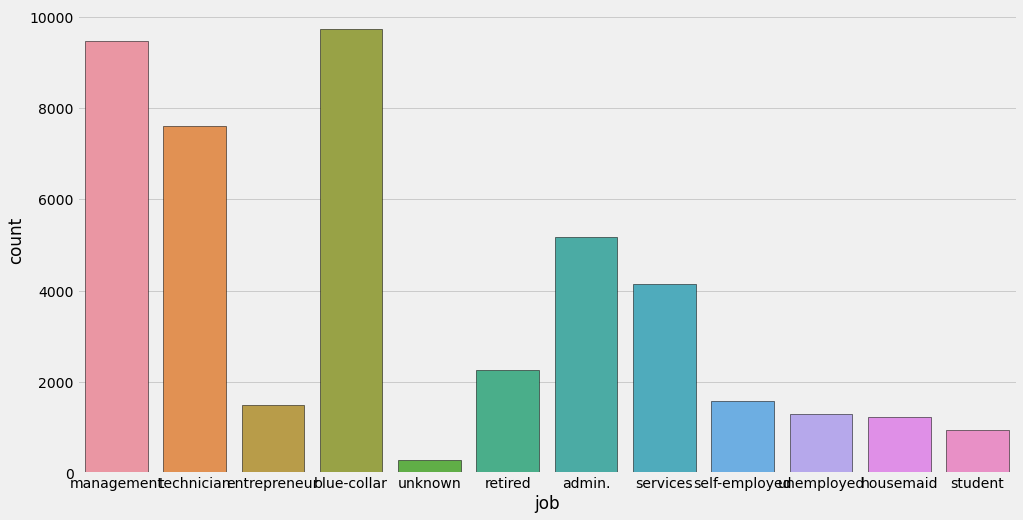

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 




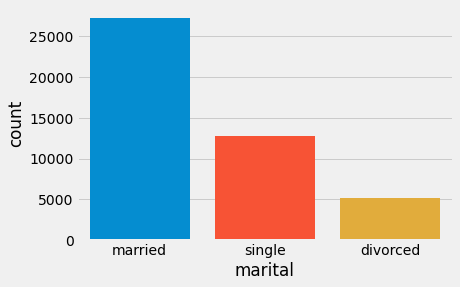

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 




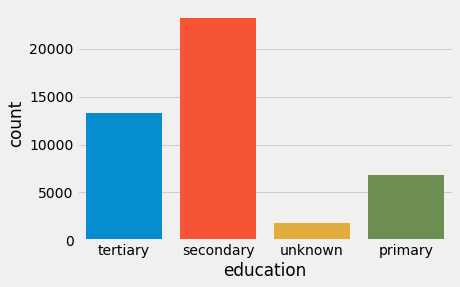

no     44396
yes      815
Name: default, dtype: int64 




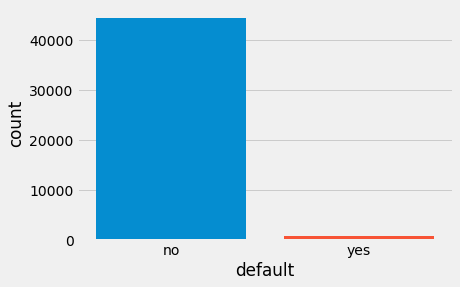

yes    25130
no     20081
Name: housing, dtype: int64 




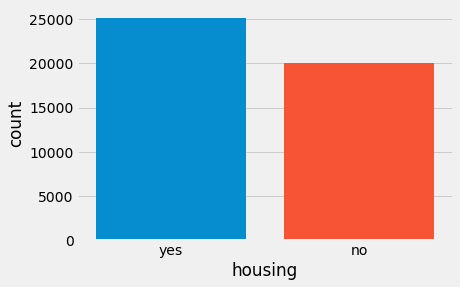

no     37967
yes     7244
Name: loan, dtype: int64 




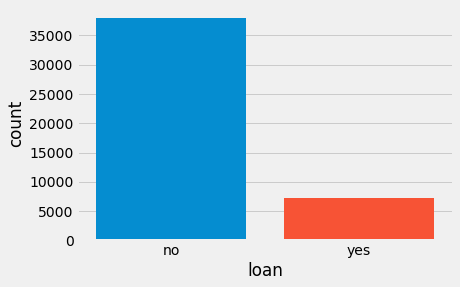

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 




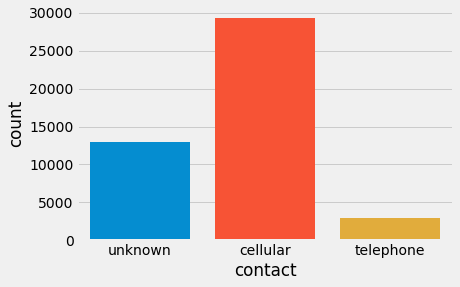

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 




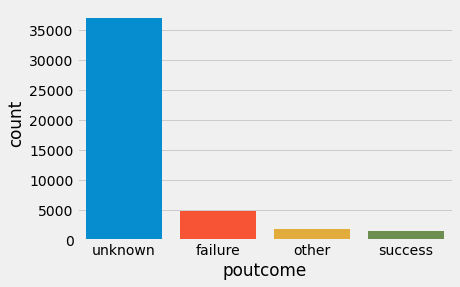

no     39922
yes     5289
Name: y, dtype: int64 




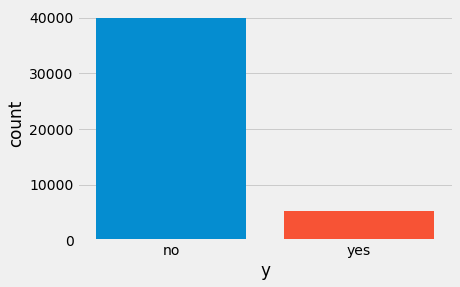

In [11]:
selected_rows=['job','marital','education','default','housing','loan','contact','poutcome','y']
for row in selected_rows:
    print(df[row].value_counts(normalize=False,ascending=False),'\n\n')
    if row != 'job':
        sns.countplot(data=df,x=row,saturation=.95)
    else:
        fig1 = plt.figure(figsize=(15,8))
        sns.countplot(data=df,x=row,edgecolor='black')
    plt.show()

### visual analysis

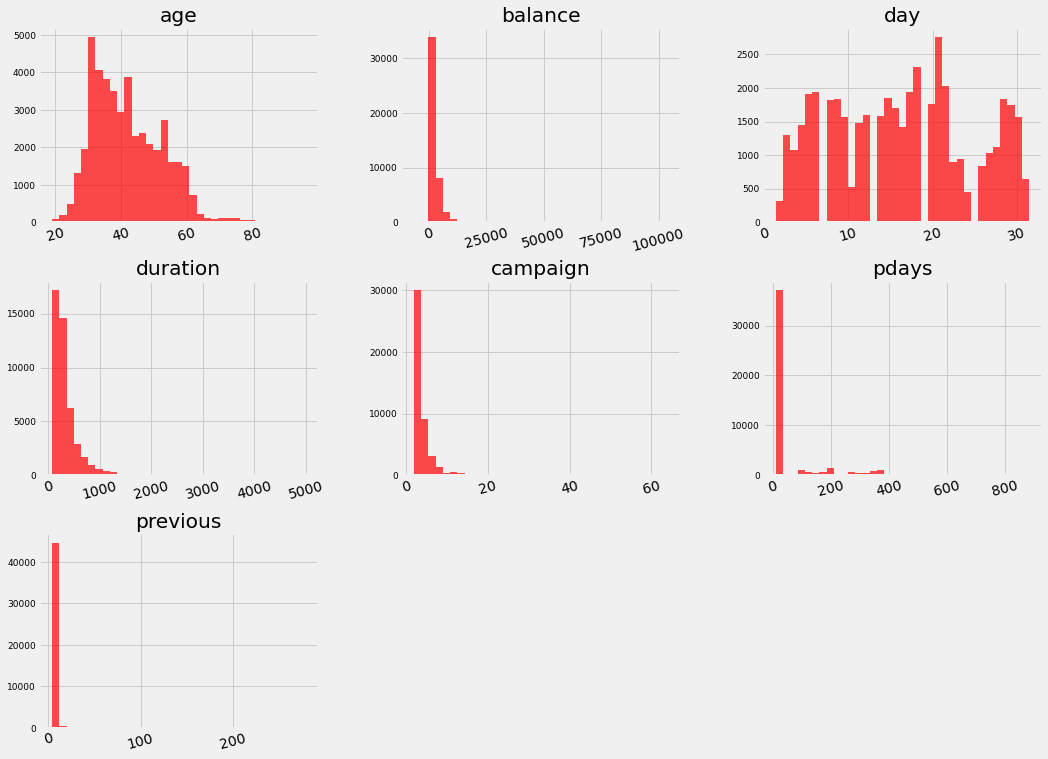

In [12]:
pd.plotting.hist_frame(df,color='red',figsize=(16,12),bins=35,xrot=15,ylabelsize=9,align='right',alpha=.7);


job status :


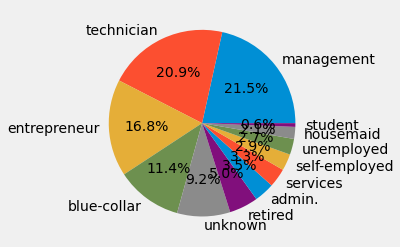


marital status :


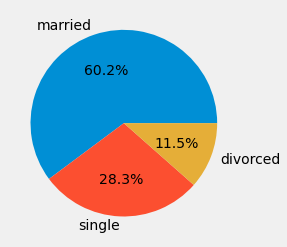


education status :


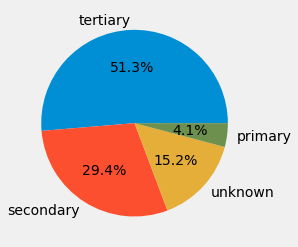


default status :


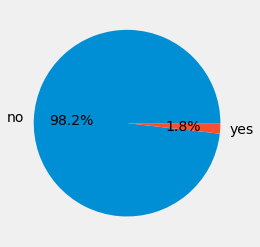


housing status :


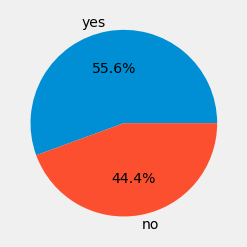


loan status :


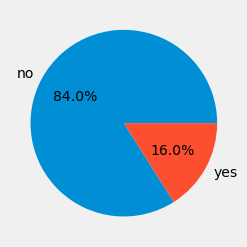


contact status :


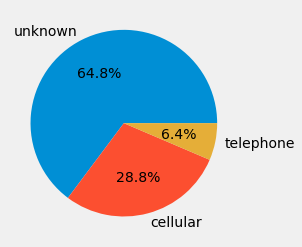


poutcome status :


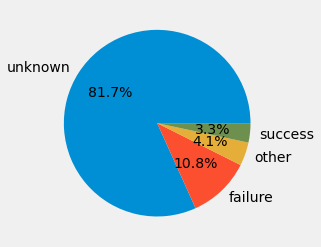


y status :


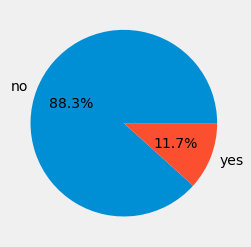

In [13]:
def to_num(series):
    return list(series.value_counts())
for row in selected_rows:
    print(f'\n{row} status :')
    plt.pie(to_num(df[row]),labels=df[row].unique(),autopct="%1.1f%%")
    plt.show()

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34




y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912




y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252




y           no   yes
default             
no       39159  5237
yes        763    52




y           no   yes
housing             
no       16727  3354
yes      23195  1935




y        no   yes
loan             
no    33162  4805
yes    6760   484




y             no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530




y    

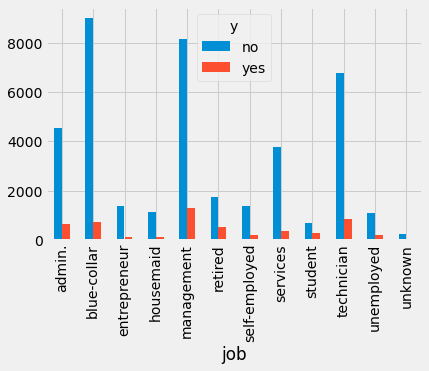

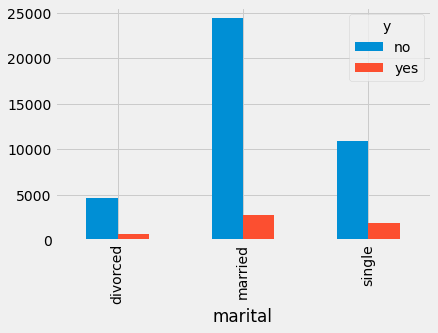

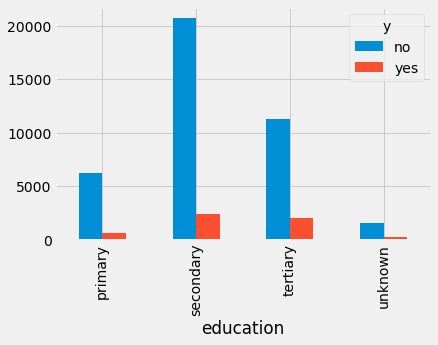

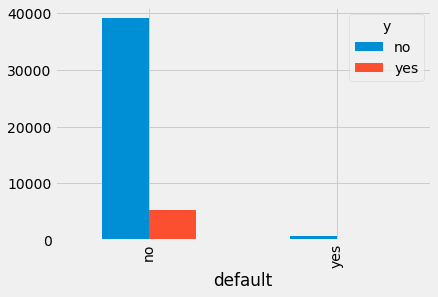

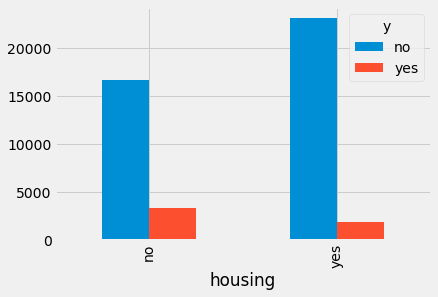

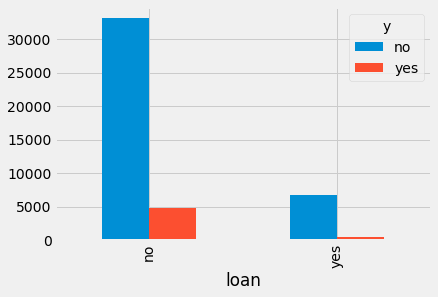

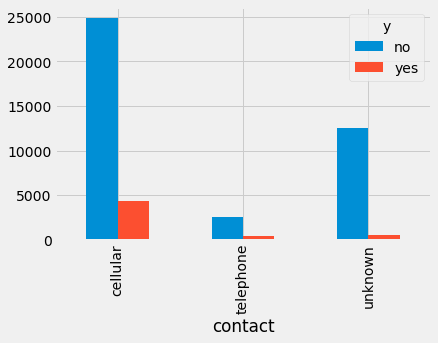

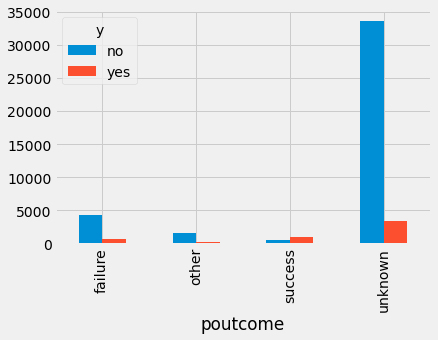

In [14]:
for row in selected_rows[:-1]:
    print(_t:=pd.crosstab(df[row],df['y']))
    _t.plot(kind='bar')
    print('\n\n\n')

## pre processing and learn

since the data is imbalanced , I'm gonna use an additional data set ( later i will use under/over smapling)

dummy variables

In [15]:
df['y']=np.where(df['y']=='no',0,1)

In [16]:
ndf = pd.get_dummies(df.iloc[:,:-1])
ndf['y'] = df['y']
print(ndf.shape)
ndf['y'].unique()

(45211, 52)


array([0, 1])

In [17]:
print(ndf.keys())

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y'],
      dtype='object')


In [18]:
x = ndf.values[:, :-1]
y = ndf.values[:, -1].reshape(-1,1)
print(x.shape,'\n',y.shape,'\n')

(45211, 51) 
 (45211, 1) 



feature selection

In [19]:
sb = SelectKBest(k=25)
sb = sb.fit(x,y.ravel())
selected_features = sb.get_support()
print('selected features : \n\n',pd.DataFrame(x,columns=ndf.columns[:-1]).columns[selected_features])
x =sb.transform(x)
x.shape

selected features : 

 Index(['balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_retired', 'job_student', 'marital_married',
       'marital_single', 'education_tertiary', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_unknown',
       'month_apr', 'month_dec', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


(45211, 25)

standardization

In [20]:
from sklearn.preprocessing import StandardScaler
stns = StandardScaler()
stns = stns.fit(x)
x = stns.transform(x)
# x = prc.standardization(x)

split train and test

In [21]:
x_train,x_test,y_train,y_test = prc.split_train_test(x=x,y=y,shuffle=True)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36168, 25), (9043, 25), (36168, 1), (9043, 1))

under/over sampling

In [23]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek()
x_train,y_train = smot.fit_sample(x_train,y_train)

learn

In [24]:
x_train.shape,y_train.reshape(-1,1).shape

((62484, 25), (62484, 1))

I'm not gonna use the gradient descent because it is very slow for this problem

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train);

In [26]:
p = log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(recall_score(y_test,p))
print(f1_score(y_test,p))

0.8417560544067234
0.4196515004840271
0.7888989990900819
0.547867298578199


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p)

array([[6745, 1199],
       [ 232,  867]])

 thanks